In [ ]:
!pip install opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.6 MB 87.0 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.6.0.66
    Uninstalling opencv-contrib-python-4.6.0.66:
      Successfully uninstalled opencv-contrib-python-4.6.0.66


In [ ]:
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
feature_extractor = 'surf' # 'sift', 'surf', 'brisk', 'orb'
feature_matching = 'bf'

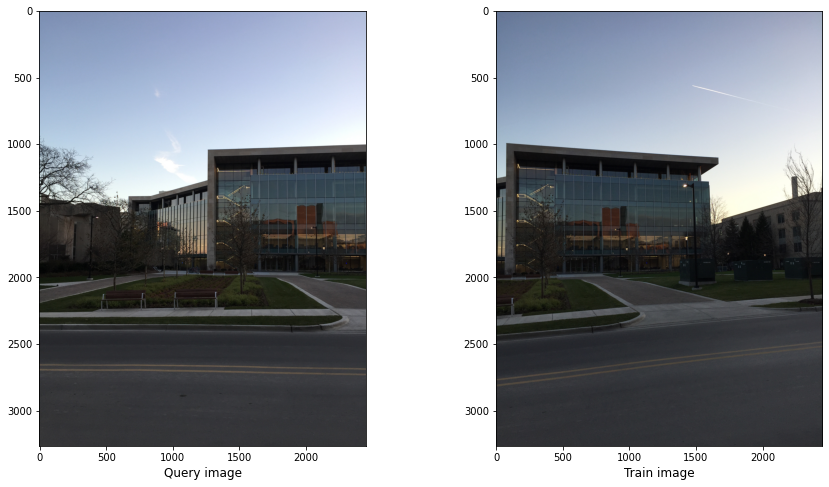

In [ ]:
trainImg = imageio.imread('/content/Pic2.jpg') # second image
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

queryImg = imageio.imread('/content/Pic1.jpg') # first image
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(15,8))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=12)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image", fontsize=12)

plt.show()

In [ ]:
def detectAndDescribe(image, method=None):
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"

    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()

    (kps, features) = descriptor.detectAndCompute(image, None)    
    return (kps, features)

In [ ]:
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

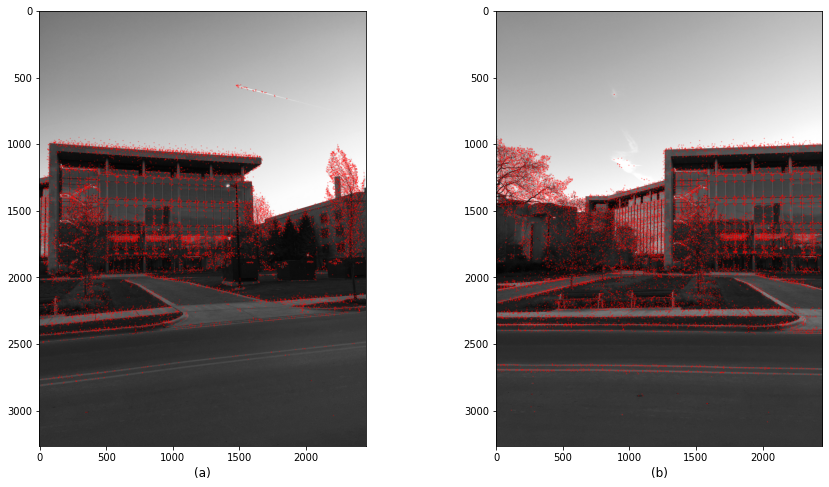

In [ ]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(255,0,0)))
ax1.set_xlabel("(a)", fontsize=12)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(255,0,0)))
ax2.set_xlabel("(b)", fontsize=12)

plt.show()

In [ ]:
def createMatcher(method,crossCheck):
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

In [ ]:
def matchKeyPointsBF(featuresA, featuresB, method):
    bf = createMatcher(method, crossCheck=True)
    best_matches = bf.match(featuresA,featuresB)
    rawMatches = sorted(best_matches, key = lambda x:x.distance)
    print("Raw Matches:", len(rawMatches))
    return rawMatches

Raw Matches: 9728


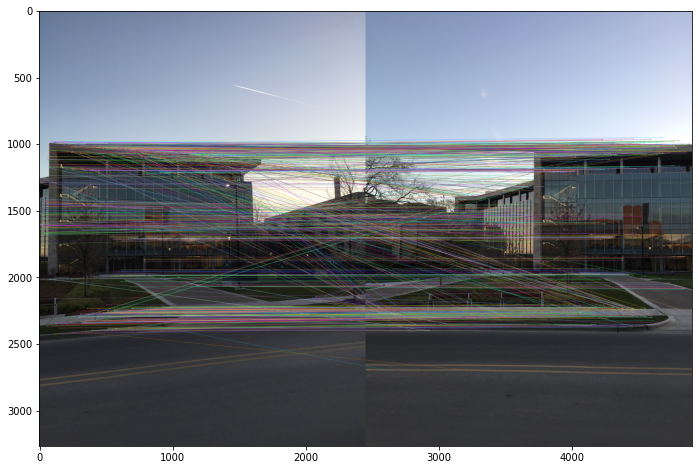

In [ ]:
# you can change the number in 'matches[:n]' based on the number of raw matches
fig = plt.figure(figsize=(15,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:800],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
plt.imshow(img)
plt.show()